In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install rasterio

In [ ]:
# import libraries
# import  rasterio
import os
import subprocess
import shutil
import fnmatch
from osgeo import gdal
import cv2
from PIL import Image
import numpy as np
import glob
import pandas as pd
from torch.utils.data import Dataset

## Split Geotiff

In [ ]:
# function that splits Geotiffs into required pieces

def create_tiles(src_path, dst_path):

    # specify tile dimension
    tile_size_x = 512
    tile_size_y = 512

    # dynamically get the image dimension
    dataset = gdal.Open(src_path)
    band = dataset.GetRasterBand(1)
    xsize = band.XSize
    ysize = band.YSize

    # clip image using using tile_size and gdal_translate iteratively
    for i in range(0, xsize, tile_size_x):
        for j in range(0, ysize, tile_size_y):
            com_string = "gdal_translate -of GTIFF -srcwin " + str(i) + ", " + str(j) + ", " + str(tile_size_x) + ", " + str(tile_size_y) + " " + str(src_path) + " " + str(dst_path) + "_" + str(i) + "_" + str(j) + ".tif"
            print(com_string)
            # os.system(com_string)

In [ ]:
DATA_PATH = 'data'
data_map = []
pla_map = []
sen_map = []

for tile in glob.glob(f'{DATA_PATH}/Tile_*'):

  for planet_img in glob.glob(f'{tile}/Planet_*_FullScene/*.tif'):
    pla_map.append(planet_img)
  
  for sentinel_img in glob.glob(f'{tile}/Sentinel_*/*.tif'):
     sen_map.append(sentinel_img))

df_p = pd.DataFrame({'img_path': pla_map[::2])


In [ ]:
# function for splitting

def gtiff_split(map, out_pth):
  for i in map: 
    tiff_name = i
    new_dir = tiff_name.split('\\')[-1]
    os.mkdir(new_dir)
    new_path = os.path.join(out_path, new_dir) #out_path/some_name
    create_tiles(i, new_path)

In [ ]:
pla_pth = "" # fill in path to results empty dir. should end n '/'
sen_pth = r"" # fill in path to results empty dir

In [ ]:
gtiff_split(pla_map, pla_pth)
gtiff_split(sen_map, sen_pth)

## Convert 4-band GTiff to 3-band RGB

In [ ]:
# Extract the first 3 bands as bytes to RGB raster
def b4_to_b3(in_tif, out_tif):
  for file in glob.glob1(in_tif, '*.tif'):
    cmd = ['gdal_translate', '-of', 'GTiff', '-b', '1', '-b', '2', '-b', '3', in_tif + file, out_tif + file]
    print("Conversion command:", cmd)
    subprocess.call(cmd)
  print(f"success! all 4-band tifs have been converted to 3-bands")

In [ ]:
in_tif = "/content/drive/MyDrive/1668_tif_data_pla/Planet_G5_FullScene/"
out_tif = "/content/drive/MyDrive/b_tif_3b/"

In [ ]:
b4_to_b3(in_tif, out_tif)

Conversion command: ['gdal_translate', '-of', 'GTiff', '-b', '1', '-b', '2', '-b', '3', '/content/drive/MyDrive/1668_tif_data_pla/Planet_G5_FullScene/20170217_131803-04_Mosaic_clip.tif', '/content/drive/MyDrive/b_tif_3b/20170217_131803-04_Mosaic_clip.tif']
Conversion command: ['gdal_translate', '-of', 'GTiff', '-b', '1', '-b', '2', '-b', '3', '/content/drive/MyDrive/1668_tif_data_pla/Planet_G5_FullScene/20170810_145354-55_Mosaic_clip.tif', '/content/drive/MyDrive/b_tif_3b/20170810_145354-55_Mosaic_clip.tif']
Conversion command: ['gdal_translate', '-of', 'GTiff', '-b', '1', '-b', '2', '-b', '3', '/content/drive/MyDrive/1668_tif_data_pla/Planet_G5_FullScene/20170929_145602-03_Mosaic_Clip.tif', '/content/drive/MyDrive/b_tif_3b/20170929_145602-03_Mosaic_Clip.tif']
Conversion command: ['gdal_translate', '-of', 'GTiff', '-b', '1', '-b', '2', '-b', '3', '/content/drive/MyDrive/1668_tif_data_pla/Planet_G5_FullScene/20180225_150221-22_Mosaic_clip.tif', '/content/drive/MyDrive/b_tif_3b/20180225_

## set nodata

In [ ]:
# function removes any no data value and sets the 3-b GTiff to n/a
def set_no_data(tif):
  for file in os.listdir(tif):
    cmd = ['gdal_edit.py', '-unsetnodata', tif+file]
    print("nodata command:", cmd)
    subprocess.call(cmd)
  print('no_data settings complete')

In [ ]:
# 3-band tif directory
band_3_tif = "/content/drive/MyDrive/b_tif_3b/"

In [ ]:
set_no_data(band_3_tif)

nodata command: ['gdal_edit.py', '-unsetnodata', '/content/drive/MyDrive/b_tif_3b/20170217_131803-04_Mosaic_clip.tif']
nodata command: ['gdal_edit.py', '-unsetnodata', '/content/drive/MyDrive/b_tif_3b/20170810_145354-55_Mosaic_clip.tif']
nodata command: ['gdal_edit.py', '-unsetnodata', '/content/drive/MyDrive/b_tif_3b/20170929_145602-03_Mosaic_Clip.tif']
nodata command: ['gdal_edit.py', '-unsetnodata', '/content/drive/MyDrive/b_tif_3b/20180225_150221-22_Mosaic_clip.tif']
nodata command: ['gdal_edit.py', '-unsetnodata', '/content/drive/MyDrive/b_tif_3b/20171007_162334_0f36_3B_AnalyticMS_SR_clip.tif']
nodata command: ['gdal_edit.py', '-unsetnodata', '/content/drive/MyDrive/b_tif_3b/20180711_150704_1044_3B_AnalyticMS_SR_clip.tif']
nodata command: ['gdal_edit.py', '-unsetnodata', '/content/drive/MyDrive/b_tif_3b/20181014_151006-07_Mosaic_clip.tif']
nodata command: ['gdal_edit.py', '-unsetnodata', '/content/drive/MyDrive/b_tif_3b/20190302_162736_82_106f_3B_AnalyticMS_SR_clip.tif']
nodata co

## Converts geotiffs to png

In [ ]:
# function converts 16bit tif to 8bit and saves as png image
def geotiff_to_png(input_tiff_img, output_png_img, output_pix_type='Byte', output_format='png'):

    img_src = gdal.Open(input_tiff_img)

    cmd = ['gdal_translate', '-ot', output_pix_type, '-of', output_format]

    for band_id in range(img_src.RasterCount):
        band_id = band_id + 1
        band = img_src.GetRasterBand(band_id)

        # cal the band minimum and max values of raster
        b_min = band.GetMinimum()
        b_max = band.GetMaximum()

        # if not exist minimum and maximum values
        if b_min is None or b_max is None:
          (b_min, b_max) = band.ComputeRasterMinMax(1)
          if b_min > 0 and b_min == b_max:
            b_min -= 1

        cmd.append('-scale_{}'.format(band_id))
        cmd.append('{}'.format(b_min))
        cmd.append('{}'.format(b_max))
        cmd.append('{}'.format(0))
        cmd.append('{}'.format(255))

    cmd.append(input_tiff_img)
    cmd.append(output_png_img)
    print("Conversion command:", cmd)
    subprocess.call(cmd)

In [ ]:
# function that activates the converter wrt geotiff in input path
def converter(input_path, output_path):
    # convert each file to output
    for file in os.listdir(input_path):
        geotiff_to_png(os.path.join(input_path, file), (output_path + file[:-3] + "png"))
    print(f"success! all files have been converted to png")

In [ ]:
# move xml extension files from png_path to its xml_path
def separate_png_xml(src_path, dst_path, ext):
    for file in fnmatch.filter(os.listdir(src_path), ext):
        shutil.move(os.path.join(src_path, file), os.path.join(dst_path, file))
    print(f"success!! xml file has been moved to Palm_xml")

In [ ]:
# directories
geotiff_path = "/content/drive/MyDrive/b_tif_3b/"
png_path = "/content/drive/MyDrive/c_png/"
xml_path = "/content/drive/MyDrive/xml/"

In [ ]:
# Convert the geotiffs to png
converter(input_path=geotiff_path, output_path=png_path)

Conversion command: ['gdal_translate', '-ot', 'Byte', '-of', 'png', '-scale_1', '2286.0', '3341.0', '0', '255', '-scale_2', '1706.0', '2815.0', '0', '255', '-scale_3', '983.0', '2124.0', '0', '255', '/content/drive/MyDrive/b_tif_3b/20170217_131803-04_Mosaic_clip.tif', '/content/drive/MyDrive/c_png/20170217_131803-04_Mosaic_clip.png']
Conversion command: ['gdal_translate', '-ot', 'Byte', '-of', 'png', '-scale_1', '7.0', '2231.0', '0', '255', '-scale_2', '92.0', '2277.0', '0', '255', '-scale_3', '87.0', '2295.0', '0', '255', '/content/drive/MyDrive/b_tif_3b/20170810_145354-55_Mosaic_clip.tif', '/content/drive/MyDrive/c_png/20170810_145354-55_Mosaic_clip.png']
Conversion command: ['gdal_translate', '-ot', 'Byte', '-of', 'png', '-scale_1', '0.0', '1068.0', '0', '255', '-scale_2', '0.0', '1189.0', '0', '255', '-scale_3', '0.0', '1180.0', '0', '255', '/content/drive/MyDrive/b_tif_3b/20170929_145602-03_Mosaic_Clip.tif', '/content/drive/MyDrive/c_png/20170929_145602-03_Mosaic_Clip.png']
Conver

Populating the interactive namespace from numpy and matplotlib


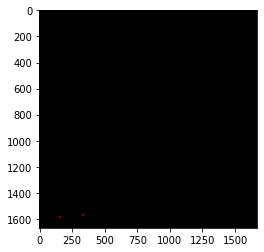

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/1668_tif_mask_png/20170501_145608-07_Mosaic_Clip.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Remove the all xml files from the png directory to xml folder
separate_png_xml(src_path=png_path, dst_path=xml_path, ext='*.xml')

success!! xml file has been moved to Palm_xml


In [ ]:
# function to delete files in directories.

def del_files(in_path):
  for file in os.listdir(in_path):
      file_path = os.path.join(in_path, file)
      try:
          if os.path.isfile(file_path) or os.path.islink(file_path):
              os.unlink(file_path)
          elif os.path.isdir(file_path):
              shutil.rmtree(file_path)
      except Exception as e:
          print('file deletion failed %s. Reason: %s' % (file_path, e))

In [ ]:
in_path= '/content/drive/MyDrive/b_tif_3b/'
del_files(in_path)
in_path1 = '/content/drive/MyDrive/c_png/'
del_files(in_path1)
in_path2 = '/content/drive/MyDrive/xml/'
del_files(in_path2)

In [ ]:
# find the number of images channels in a particular image
image = '/content/drive/MyDrive/images/Kudos1.png'

img = Image.open(image)

im1 = Image.Image.getbands(img)

print(im1)

# convert to numpy array
img = np.array(img)

# find number of channels
if img.ndim == 2:
    channels = 1
    print("image has 1 channel")
else:
    channels = img.shape[-1]
    print("image has", channels, "channels")